## Config the environment

#### Installing libraries:

1. Tensorflow
2. Keras
3. matplotlib
4. numpy

In [1]:
# !pip install -U tensorflow keras matplotlib numpy

#### Disabling the warnings

In [3]:
import warnings
warnings.filterwarnings('ignore')

<br>
## Loading the dataset

the Fashion MNIST counts with 70000 of images splided in 10 types of clothes and accessories:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

In [4]:
from keras.datasets import fashion_mnist

# Get the dataset
((X_train_ori, y_train_ori), (X_test_ori, y_test_ori)) = fashion_mnist.load_data()

# Create a reference for the labels
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Print a summary aboout the train dataset
print("Train shape:", X_train_ori.shape)
print("Test shape:", X_test_ori.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


## Plot some images

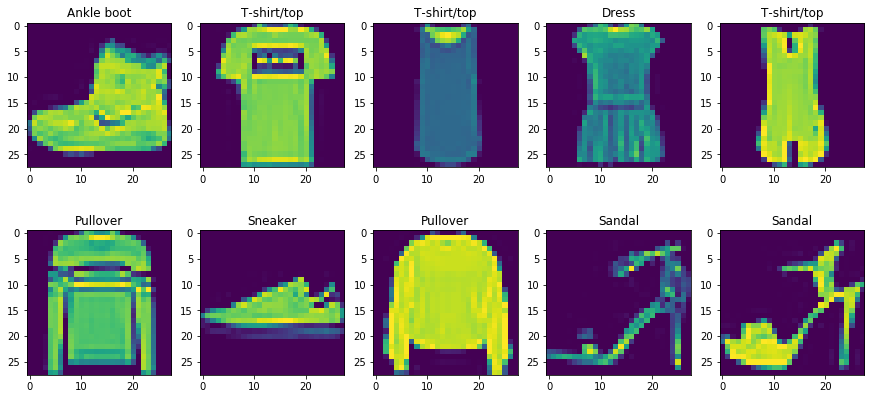

In [6]:
import matplotlib.pyplot as plt

# Configure the size of the image
plt.figure(figsize=(15,7))

# Plot the images
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(X_train_ori[i])
  plt.title(labels[y_train_ori[i]])

plt.show()

## Normalize the dataset

- Reshape the image vector from 2D images to 3D with this distribuition (inputs size, height, columns, colors). That reshape basicly add one more dimesion corresponding the color, just is a pattern,.
- Rescale the value of each one pixel. THe variace between 0 and 255 probably will incresse too much the value of the weight, making the train more difficult. To solve that problem we rescale into 0 and 1.
- Tranform the result to categorial. The Fashion MNIST split the classes of the clothes using values between 0 and 9, but isn't scalar problem, so it's necessary tranform into a vector with mutiples results.
E.g.: Case the value is `4` the result will be `[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]`

In [7]:
from keras.utils import np_utils

# Reshape to 4D array (inputs size, height, columns, colors)
X_train = X_train_ori.reshape(X_train_ori.shape[0], 28, 28, 1)
# Normalize the value from 0 to 1.0
X_train = X_train.astype('float32')
X_train/=255

# Reshape to 4D array (inputs size, height, columns, colors)
X_test = X_test_ori.reshape(X_test_ori.shape[0], 28, 28, 1)
# Normalize the value from 0 to 1.0
X_test = X_test.astype('float32')
X_test/=255

# Transforma in categorical results
y_train = np_utils.to_categorical(y_train_ori)
y_test= np_utils.to_categorical(y_test_ori)